In [1]:
import pandas as pd 
from unidecode import unidecode
from neo4j import GraphDatabase
from decouple import config
import networkx as nx
import numpy as np

In [2]:
# !head -n 5 "../data/raw/ProuniRelatorioDadosAbertos2020.csv"

In [3]:
class DataCleaning:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def removing_columns(self, aditional_columns):
        """
        Remove colunas adicionais especificadas no DataFrame e retorna o DataFrame modificado.

        :param colunas_adicionais: Lista de nomes de colunas adicionais para remover.
        """
        modified_dataframe = self.dataframe.copy()
        
        modified_dataframe = self.dataframe.drop(columns = aditional_columns, errors = "ignore")
        
        self.dataframe = modified_dataframe
    
    def removing_accents(self):
        """
        Remove acentos de todas as colunas de texto no DataFrame.
        """
        modified_dataframe = self.dataframe.copy()
        # Itera sobre as colunas do dataframe
        for column in modified_dataframe.columns:
            # Verifica se a coluna contém texto (tipo "object")
            if (modified_dataframe[column].dtype == "object"):
                # Remove acentos dos valores, verificando se é uma string antes
                modified_dataframe[column] = modified_dataframe[column].apply(
                    lambda x: unidecode(x) if isinstance(x, str) else x
                )
        self.dataframe = modified_dataframe
        
    def formatar_data(self, date_column):
        """
        Formata uma coluna de data no DataFrame e retorna o DataFrame modificado.
        
        :param date_column: Nome da coluna de data.
        """
        modified_dataframe = self.dataframe.copy()
        for column in modified_dataframe.columns:
            if (modified_dataframe[column].dtype == "object"):
                modified_dataframe[date_column] = modified_dataframe[date_column].apply(lambda x: pd.to_datetime(x, errors = 'coerce', format = '%d/%m/%Y'))
                                
        self.dataframe = modified_dataframe
        
    def arrange_columns(self, columns_to_arrange):
        """
        Organiza as linhas do DataFrame com base nos valores das colunas especificadas.

        :param columns_to_arrange: Lista de nomes das colunas pelas quais deseja organizar o DataFrame.
        """
        if all(coluna in self.dataframe.columns for coluna in columns_to_arrange):
            modified_dataframe = self.dataframe.copy()
            modified_dataframe.sort_values(by=columns_to_arrange, inplace=True)
            self.dataframe = modified_dataframe
        else:
            colunas_faltando = [coluna for coluna in columns_to_arrange if coluna not in self.dataframe.columns]
            print(f'Uma ou mais colunas ({", ".join(colunas_faltando)}) não existem no DataFrame.')


    def save_to_csv(self, filename):
        """
        Salva o DataFrame em um arquivo CSV.
        
        :param nome_arquivo: Nome do arquivo CSV de saída.
        """
        self.dataframe.to_csv(filename, index = False)
        
    def getting_modified_dataframe(self):
        """
        Retorna o DataFrame modificado após todas as operações de limpeza.
        """
        return self.dataframe

In [4]:
# Carregar o arquivo CSV em um DataFrame
caminho_arquivo_csv = '../data/raw/ProuniRelatorioDadosAbertos2020.csv'
dataframe = pd.read_csv(caminho_arquivo_csv, sep=";", encoding="UTF-8")

# Criar uma instância da classe DataCleaning com o DataFrame
limpeza = DataCleaning(dataframe)

# Remover colunas adicionais
# limpeza.removing_columns(["ID"])

limpeza.removing_accents()

date_column = ["DATA_NASCIMENTO"]

limpeza.formatar_data(date_column)

organizar_dados = ["CODIGO_EMEC_IES_BOLSA"]

limpeza.arrange_columns(organizar_dados)

dataframe_modificado = limpeza.getting_modified_dataframe()

# Salvar o DataFrame limpo como um novo arquivo CSV
nome_arquivo_saida = '../data/processed/ProuniRelatorio_processed.csv'
limpeza.save_to_csv(nome_arquivo_saida)

In [5]:
# dataframe_modificado.dtypes

In [6]:
dataframe_modificado.head(30)
# dataframe_modificado.info()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
117444,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,CURITIBA,PUCPR - CAMPUS CURITIBA,INTEGRAL,EAD,GESTO DE RECURSOS HUMANOS,CURSO A DISTNCIA,107.XXX.XXX-31,F,Branca,1998-04-27,N,SUL,PR,CURITIBA
114136,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,INTEGRAL,EAD,ADMINISTRAO,CURSO A DISTNCIA,503.XXX.XXX-80,F,Parda,2001-11-11,N,SUL,RS,PORTO ALEGRE
114135,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,INTEGRAL,EAD,GESTO COMERCIAL,CURSO A DISTNCIA,088.XXX.XXX-83,F,Parda,1999-11-05,N,SUL,PR,CAMPO MOURAO
114134,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,INTEGRAL,EAD,GESTO COMERCIAL,CURSO A DISTNCIA,012.XXX.XXX-88,M,Preta,1996-05-30,N,SUL,PR,PARANACITY
114133,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,INTEGRAL,PRESENCIAL,DIREITO,NOTURNO,078.XXX.XXX-22,M,Branca,1995-03-11,N,SUL,PR,MARINGA
114132,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,PARCIAL,PRESENCIAL,DIREITO,NOTURNO,001.XXX.XXX-04,F,Branca,1969-12-31,N,SUL,PR,MARINGA
114131,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,PARCIAL,PRESENCIAL,DIREITO,NOTURNO,337.XXX.XXX-66,F,Parda,2002-03-09,N,SUL,PR,MARINGA
114130,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,MARINGA,CAMPUS MARING,INTEGRAL,PRESENCIAL,DIREITO,NOTURNO,098.XXX.XXX-07,F,Preta,1995-05-15,N,SUL,PR,COLORADO
66758,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,CURITIBA,PUCPR - CAMPUS CURITIBA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DISTNCIA,070.XXX.XXX-60,F,Branca,1994-08-21,N,SUL,PR,SAO JOSE DOS PINHAIS
68697,2020,10,PONTIFCIA UNIVERSIDADE CATLICA DO PARAN,CURITIBA,PUCPR - CAMPUS CURITIBA,INTEGRAL,PRESENCIAL,MATEMTICA,NOTURNO,088.XXX.XXX-58,M,Parda,1993-09-03,N,SUL,PR,CURITIBA


/home/calendario2009/anaconda3/envs/base-conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


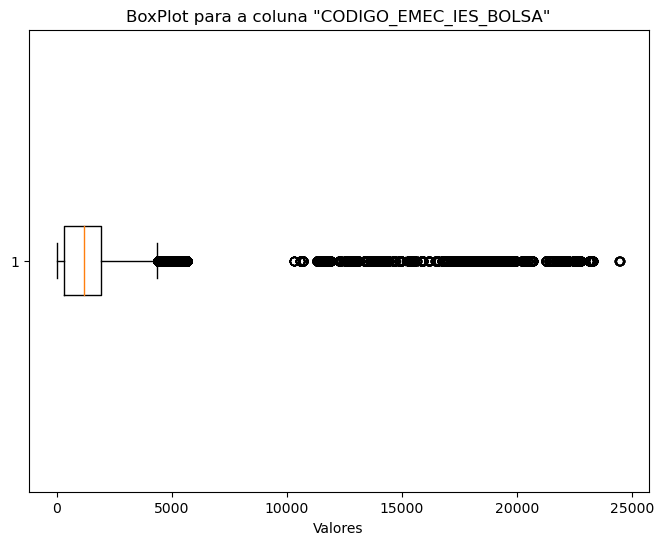

Tabela de Contingência:
REGIAO_BENEFICIARIO  CENTRO-OESTE  NORDESTE  NORTE  SUDESTE    SUL
RACA_BENEFICIARIO                                                 
Amarela                       415       838    301     1066    280
Branca                       3797      7665   2133    31757  19132
Ind�gena                       20        50     63       17      3
N�o Informada                  11        14      8       25     15
Parda                        7247     24446  11932    28965   5477
Preta                        1765      6239   1866     9814   1469

Resultado do Teste Qui-Quadrado:
Chi2: 26261.047298680955
P-valor: 0.0


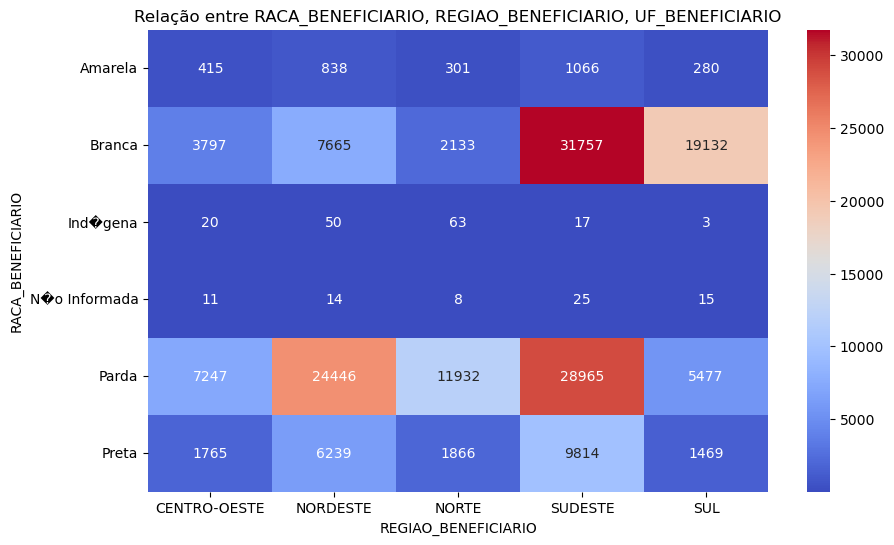

Tabela de Contingência:
MODALIDADE_ENSINO_BOLSA    EAD  PRESENCIAL
SEXO_BENEFICIARIO                         
F                        33072       68065
M                        20753       44940

Resultado do Teste Qui-Quadrado:
Chi2: 22.374167894202426
P-valor: 2.243716621918791e-06


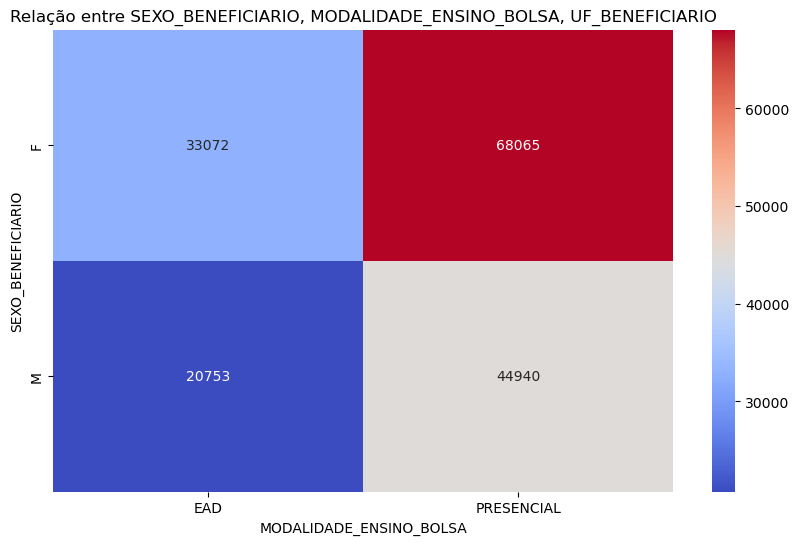

Tabela de Contingência:
NOME_IES_BOLSA     AJES - FACULDADE DO VALE DO JURUENA  \
SEXO_BENEFICIARIO                                        
F                                                    8   
M                                                    4   

NOME_IES_BOLSA     ALFA - FACULDADE DE ALMENARA  \
SEXO_BENEFICIARIO                                 
F                                            22   
M                                            12   

NOME_IES_BOLSA     ATOPP BRASIL FACULDADE DE NEG�CIOS  \
SEXO_BENEFICIARIO                                       
F                                                  10   
M                                                   8   

NOME_IES_BOLSA     CENTRO DE ENSINO SUPERIOR DE DIVIN�POLIS  \
SEXO_BENEFICIARIO                                             
F                                                         1   
M                                                         0   

NOME_IES_BOLSA     CENTRO DE ENSINO SUPERIOR DE ILHEUS  

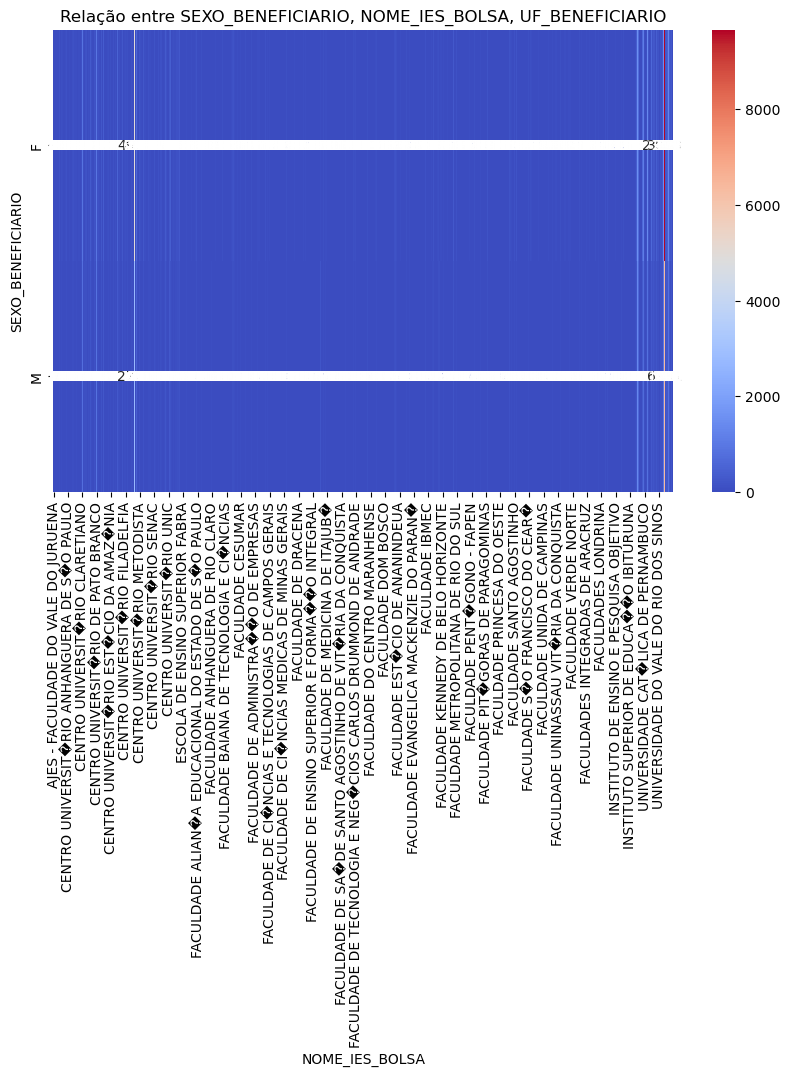

Tabela de Contingência:
UF_BENEFICIARIO                   AC    AL    AM   AP     BA    CE    DF  \
BENEFICIARIO_DEFICIENTE_FISICO                                             
N                               1370  1374  3507  806  10193  6923  3659   
S                                  9    13    24    5     60    42    38   

UF_BENEFICIARIO                   ES    GO    MA  ...    PR    RJ    RN    RO  \
BENEFICIARIO_DEFICIENTE_FISICO                    ...                           
N                               3812  6047  6038  ...  9836  8411  1796  2727   
S                                 27    48    34  ...    83    77    14    27   

UF_BENEFICIARIO                  RR     RS    SC    SE     SP    TO  
BENEFICIARIO_DEFICIENTE_FISICO                                       
N                               417  11384  4939  1272  40078  1450  
S                                 4     98    36    15    301    13  

[2 rows x 27 columns]

Resultado do Teste Qui-Quadrado:
Chi2: 30.

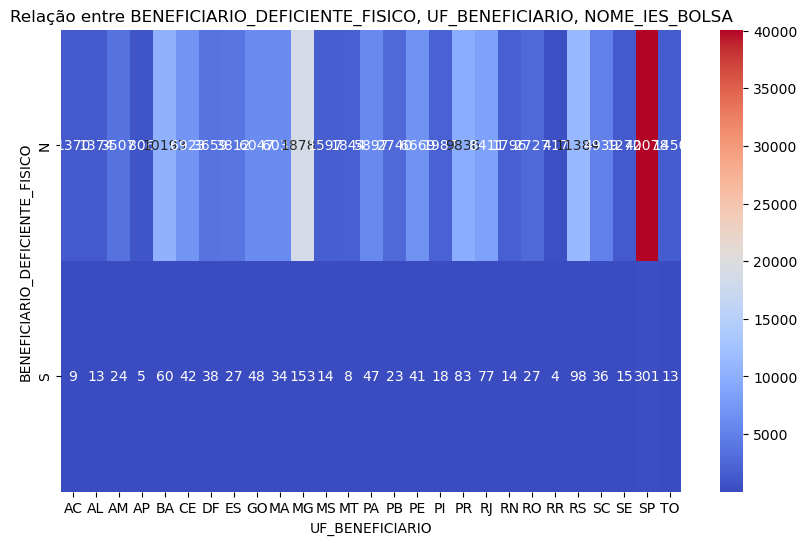

In [7]:
import sys
from pathlib import Path

# Procura o diretório raiz do projeto com o sys.path
sys.path.append(str(Path.cwd().parent))

from src.visualization.visualize import DataVisualization

data_visualization = DataVisualization()

boxplot_columns = ["CODIGO_EMEC_IES_BOLSA"]

for coluna in boxplot_columns:
    data_visualization.boxplot_plot(dataframe_modificado, coluna)

data_visualization.plotar_tabela_contingencia(dataframe, "RACA_BENEFICIARIO", "REGIAO_BENEFICIARIO", "UF_BENEFICIARIO")
data_visualization.plotar_tabela_contingencia(dataframe, "SEXO_BENEFICIARIO", "MODALIDADE_ENSINO_BOLSA", "UF_BENEFICIARIO")
data_visualization.plotar_tabela_contingencia(dataframe, "SEXO_BENEFICIARIO", "NOME_IES_BOLSA", "UF_BENEFICIARIO")
data_visualization.plotar_tabela_contingencia(dataframe, "BENEFICIARIO_DEFICIENTE_FISICO", "UF_BENEFICIARIO", "NOME_IES_BOLSA")